In [102]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [91]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<H1> Exploratory Data Analysis </H1>

In [33]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [35]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [36]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

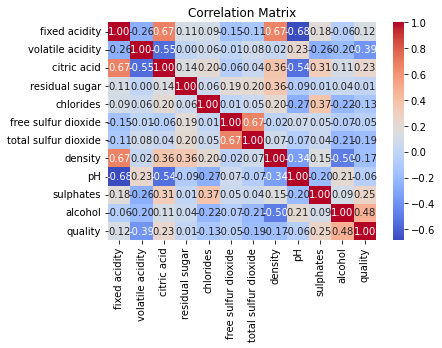

In [37]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<H1> Data Preprocessing </H1>

In [92]:
X = df.drop(['quality'],axis=1)
y = df['quality']

In [93]:
X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [94]:
y.head(5)

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [95]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 1)
print('Initial size = ',X.shape,' Train size = ',X_train.shape, 'Test size = ', X_test.shape)

Initial size =  (1599, 11)  Train size =  (1279, 11) Test size =  (320, 11)


<H2> Linear Regressor </H2>

In [87]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [88]:
y_pred = linear_model.predict(X_test)

In [89]:
r2 =  "{:.2f}".format(r2_score(y_test, y_pred))
mse =  "{:.2f}".format(mean_squared_error(y_test, y_pred))
mae =  "{:.2f}".format(mean_absolute_error(y_test, y_pred))

print('Linear Regressor \n')
print(f"Coefficient of Determination: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absoluter Error: {mae}")

Linear Regressor 

Coefficient of Determination: 0.33
Mean Squared Error: 0.38
Mean Absoluter Error: 0.47


<H2> Polynomial Regressor </H2>

In [96]:
degree = 2

poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [97]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [98]:
y_pred_poly = poly_model.predict(X_test_poly)

In [99]:
r2_poly = "{:.2f}".format(r2_score(y_test, y_pred_poly))
mse_poly = "{:.2f}".format(mean_squared_error(y_test, y_pred_poly))
mae_poly = "{:.2f}".format(mean_absolute_error(y_test, y_pred_poly))

print(f'Polynomial Regressor - Degree {degree}\n')
print(f'Coefficient of Determination: {r2_poly}')
print(f'Mean Squared Error: {mse_poly}')
print(f'Mean Absolute Error: {mae_poly}')

Polynomial Regressor - Degree 2

Coefficient of Determination: 0.30
Mean Squared Error: 0.40
Mean Absolute Error: 0.48


<H2> Random Forest Regressor </H2>

In [62]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [63]:
y_pred_rf = rf_model.predict(X_test)

In [65]:
r2_rf = "{:.2f}".format(r2_score(y_test, y_pred_rf))
mse_rf = "{:.2f}".format(mean_squared_error(y_test, y_pred_rf))
mae_rf =  "{:.2f}".format(mean_absolute_error(y_test, y_pred_rf))

print('Random Forest Regressor \n')
print(f'Coefficient of Determination: {r2_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'Mean Absolute Error: {mae_rf}')

Random Forest Regressor 

Coefficient of Determination: 0.43
Mean Squared Error: 0.32
Mean Absolute Error: 0.41


<H2> Support Vector Regression </H2>

In [75]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [78]:
y_pred_svr = svr_model.predict(X_test)

In [79]:
r2_svr = "{:.2f}".format(r2_score(y_test, y_pred_svr))
mse_svr = "{:.2f}".format(mean_squared_error(y_test, y_pred_svr))
mae_svr = "{:.2f}".format(mean_absolute_error(y_test, y_pred_svr))

print('Support Vector Regression \n')
print(f'Coefficient of Determination: {r2_svr}')
print(f'Mean Squared Error: {mse_svr}')
print(f'Mean Absolute Error: {mae_svr}')

Support Vector Regression 

Coefficient of Determination: 0.32
Mean Squared Error: 0.39
Mean Absolute Error: 0.47


<H3> Best Model </H3>

1. Highest Coefficient of Determination (R-squared):
* **Random Forest Regressor: 0.43**
* Linear Regressor: 0.33
* Support Vector Regression: 0.32
* Polynomial Regressor (Degree 2): 0.30

The Random Forest Regressor has the highest R-squared value, indicating that it explains a larger proportion of the variance in the target variable compared to the other models.

2. Lowest Mean Squared Error (MSE):
* **Random Forest Regressor: 0.32**
* Linear Regressor: 0.38
* Support Vector Regression: 0.39
* Polynomial Regressor (Degree 2): 0.40

The Random Forest Regressor has the lowest MSE, suggesting that, on average, its predictions have the smallest squared differences from the actual values.

3. Lowest Mean Absolute Error (MAE):
* **Random Forest Regressor: 0.41**
* Linear Regressor: 0.47
* Support Vector Regression: 0.47
* Polynomial Regressor (Degree 2): 0.48

The Random Forest Regressor also has the lowest MAE, indicating that, on average, its predictions have the smallest absolute differences from the actual values.

Based on these observations, the **Random Forest Regressor** seems to be the most promising model.

<H3> Save Best Model </H3>

In [103]:
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(linear_model, model_file)

<H1> Tkinter Desktop Application </H1>

In [109]:
import tkinter as tk
from tkinter import messagebox
import pickle
import numpy as np

# Load the best model using pickle
with open('rf_model.pkl', 'rb') as model_file:
    best_model = pickle.load(model_file)

# Function to make predictions
def predict():
    try:
        # Get input values from the entry widgets
        fixed_acidity = float(entry_fixed_acidity.get())
        volatile_acidity = float(entry_volatile_acidity.get())
        citric_acid = float(entry_citric_acid.get())
        residual_sugar = float(entry_residual_sugar.get())
        chlorides = float(entry_chlorides.get())
        free_sulfur_dioxide = float(entry_free_sulfur_dioxide.get())
        total_sulfur_dioxide = float(entry_total_sulfur_dioxide.get())
        density = float(entry_density.get())
        pH = float(entry_pH.get())
        sulphates = float(entry_sulphates.get())
        alcohol = float(entry_alcohol.get())

        # Make a prediction using the loaded model
        input_data = np.array([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
                                chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density,
                                pH, sulphates, alcohol]])
        prediction = best_model.predict(input_data)

        # Display the prediction
        messagebox.showinfo('Prediction Result', f'The predicted wine quality is: {prediction[0]:.2f}')

    except ValueError:
        messagebox.showerror('Error', 'Invalid input. Please enter numeric values.')

# GUI setup
app = tk.Tk()
app.title('Wine Quality Predictor')

# Entry widgets for user input
labels = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar',
          'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density',
          'pH', 'Sulphates', 'Alcohol']

entries = []

for i, label_text in enumerate(labels):
    label = tk.Label(app, text=label_text + ':')
    label.grid(row=i, column=0)
    entry = tk.Entry(app)
    entry.grid(row=i, column=1)
    entries.append(entry)

# Assigning entry widgets to variables
(entry_fixed_acidity, entry_volatile_acidity, entry_citric_acid, entry_residual_sugar,
 entry_chlorides, entry_free_sulfur_dioxide, entry_total_sulfur_dioxide, entry_density,
 entry_pH, entry_sulphates, entry_alcohol) = entries

# Button to trigger prediction
predict_button = tk.Button(app, text='Predict', command=predict)
predict_button.grid(row=len(labels), column=0, columnspan=2)

# Run the application
app.mainloop()